# Demo of script to calculate differences between sequences in multiFASTA file

This notebook is to demonstrate `score_differences_between_sequences_by_pairwise_alignment.py`.  
The script takes sequences in FASTA format that haven't been aligned. It performs pairwise aligments for each pair combination and makes a matrix of the differences between each.  
If your seqeunces are already aligned, use  Torsten Seemann's `snp-dists` software to make a matrix of the differences, see [here](https://github.com/tseemann/snp-dists).

First realized and planned [here](https://git.io/fj9ES). 

It is highly related to my script `roughly_score_relationships_to_subject_seq_pairwise_premsa.py`, available [here](https://github.com/fomightez/sequencework/tree/master/alignment-utilities).



This notebook is meant to present snippets that could be adapted and placed in a typical workflow.

If you are viewing this statically and to instead run it actively. Go [here](https://github.com/fomightez/cl_sq_demo-binder), press the `launch binder` badge, and then when the session spins up, select `Demo of script to calculate differences between sequences in multiFASTA file` from the list. Then you'll be able to actively run this notebook without needing to install anything. The demostration parts below are written as if you are in an active session.

------

<div class="alert alert-block alert-warning">
<p>If you haven't used one of these notebooks before, they're basically web pages in which you can write, edit, and run live code. They're meant to encourage experimentation, so don't feel nervous. Just try running a few cells and see what happens!.</p>

<p>
    Some tips:
    <ul>
        <li>Code cells have boxes around them. When you hover over them a <i class="fa-step-forward fa"></i> icon appears.</li>
        <li>To run a code cell either click the <i class="fa-step-forward fa"></i> icon, or click on the cell and then hit <b>Shift+Enter</b>. The <b>Shift+Enter</b> combo will also move you to the next cell, so it's a quick way to work through the notebook.</li>
        <li>While a cell is running a <b>*</b> appears in the square brackets next to the cell. Once the cell has finished running the asterisk will be replaced with a number.</li>
        <li>In most cases you'll want to start from the top of notebook and work your way down running each cell in turn. Later cells might depend on the results of earlier ones.</li>
        <li>To edit a code cell, just click on it and type stuff. Remember to run the cell once you've finished editing.</li>
    </ul>
</p>
</div>

----

##  Preparation

You'll need the script and some sequences to compare.

In [1]:
# Get the script
!curl -O https://raw.githubusercontent.com/fomightez/sequencework/master/alignment-utilities/score_differences_between_sequences_by_pairwise_alignment.py

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 24200  100 24200    0     0   125k      0 --:--:-- --:--:-- --:--:--  125k


#### Display USAGE block

In [2]:
!python score_differences_between_sequences_by_pairwise_alignment.py -h

usage: score_differences_between_sequences_by_pairwise_alignment.py
       [-h] [-bl BLOCK_LEN] [-dfo DF_OUTPUT] SEQS_FILE

score_differences_between_sequences_by_pairwise_alignment.py Takes a file of
multiple sequences in FASTA format and aligns each of them in turn to each
other sequence. The output is a matrix of the differences. If your sequences
are already aligned, just use Torsten Seemann's `snp-dists` software to make a
matrix of the differences, see https://github.com/tseemann/snp-dists. However,
if the sequence happens to be moderate- or large-sized (> 5 kb), by default it
only samples part of the sequence due to memory limitations. It scores the
alignments and produces a dataframe ranking the sequences from most similar to
most different relative the first one in the supplied file. The dataframe is
saved as a tabular text file when used on the command line. Optionally, it can
also return that dataframe for use inside a Jupyter notebook. **** Script by
Wayne Decatur (fomighte

Next, we'll get example data to use.

In [3]:
# Get a file of protein sequences
!curl -OL https://gist.githubusercontent.com/fomightez/f46b0624f1d8e3abb6ff908fc447e63b/raw/3d081a7605b979f0e15a42a7d90e4b6c470b7ec6/uzzzdemo_seqs.fa
!mv uzzzdemo_seqs.fa seqs.fa

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100  4594  100  4594    0     0  22742      0 --:--:-- --:--:-- --:--:-- 22742


Make sure we have the sequence file `seqs.fa` now.

In [4]:
!ls -lah seqs.fa

-rw-r--r-- 1 jovyan jovyan 4.5K Aug  3 20:07 seqs.fa


##  Basics

This section is meant to prepare to show the basics of using it on the command line.  
(On the 'proper' command line you wouldn't need the exclamation points I put in front of these commands for them to work in this notebook.)

In [5]:
%run score_differences_between_sequences_by_pairwise_alignment.py seqs.fa

Sequences read in...
Longest sequence in input detected as 890.
...calculating all pairs of pairwise alignments...summarizing differences...

Results converted to a matrix of differences...
        ScSTV1  TdSTV1   Yl   Cl  VPH1
ScSTV1       0     292  513  536   530
TdSTV1     292       0  496  522   522
Yl         513     496    0  402   417
Cl         536     522  402    0   373
VPH1       530     522  417  373     0

Matrix heatmap image saved to:
diff_score_matrix.png


A table of the data has been saved as a text file (tab-delimited).
DATA is stored as ==> 'diff_score_matrix.tsv'

Examine the output text data.

In [6]:
!cat diff_score_matrix.tsv

	ScSTV1	TdSTV1	Yl	Cl	VPH1
ScSTV1	0	292	513	536	530
TdSTV1	292	0	496	522	522
Yl	513	496	0	402	417
Cl	536	522	402	0	373
VPH1	530	522	417	373	0


You'll note that in the stderror output above when the script was run, it said:

```bash
Matrix heatmap image saved to:
diff_score_matrix.png
```

This is because an heatmap plot of the matrix was saved as an image when the script was called from the command line equivalent. 
This code displays the image here (alternateively you can view it in the file browser, if you prefer):

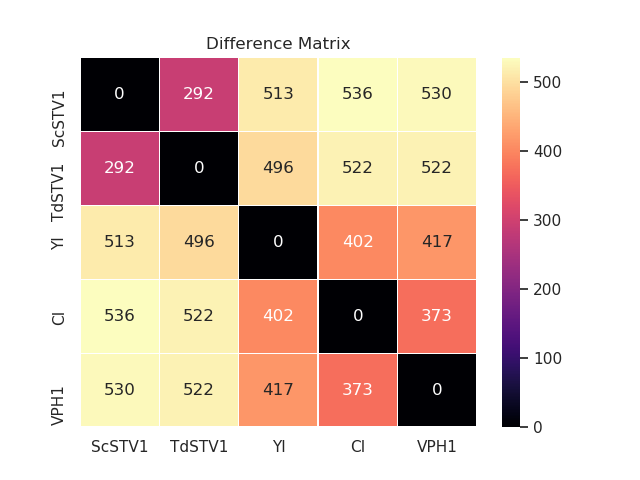

In [7]:
from IPython.display import Image
Image("diff_score_matrix.png")

(Note that often if you just re-run the command `%run score_differences_between_sequences_by_pairwise_alignment.py seqs.fa` that is in the above cell, the plot will be rendered right in the notebook as part of the output. However, as that is awkward, I illustrate the output directly above.)

There are a few additional options available when calling this script from the command line. They are listed when you display the USAGE block via `python score_differences_between_sequences_by_pairwise_alignment.py -h`. 

You can change the sequence file `seqs.fa` to contain your sequences and run it on your data if you'd like right now. Be sure to download anything you make that is useful.

However, there are more options if you import the main function of this script into a Jupyter notebook and use it there. The remainder focuses on that situation.

## Use script in a Jupyter notebook (or IPython console) to score differences in sequences

This is meant to demonstrate using the main function of this script in a Jupyter notebook. The same would largely hold if you were using it in an IPython console.

The first two cells just repeat the preparation in case you skipped to this section.

In [8]:
# Get the script if the above section wasn't run
import os
file_needed = "score_differences_between_sequences_by_pairwise_alignment.py"
if not os.path.isfile(file_needed):
    !curl -O https://raw.githubusercontent.com/fomightez/sequencework/master/alignment-utilities/score_differences_between_sequences_by_pairwise_alignment.py

In [9]:
# Get the sequences to use as example data if not already here
import os
file_needed = "seqs.fa"
if not os.path.isfile(file_needed):
    !curl -OL https://gist.githubusercontent.com/fomightez/f46b0624f1d8e3abb6ff908fc447e63b/raw/3d081a7605b979f0e15a42a7d90e4b6c470b7ec6/uzzzdemo_seqs.fa
    !mv uzzzdemo_seqs.fa seqs.fa

Now that we have the script and some example sequences to analyze, we need to bring the main function of the script into the memory of this notebook's environment. This next, redundant-looking line will do that.

In [10]:
from score_differences_between_sequences_by_pairwise_alignment import score_differences_between_sequences_by_pairwise_alignment

Now the function can be used on the sameple data to make a dataframe of the difference matrix. The basics are shown here.

Sequences read in...
Longest sequence in input detected as 890.
...calculating all pairs of pairwise alignments...summarizing differences...

Results converted to a matrix of differences...

A table of the data has been saved as a text file (tab-delimited).
DATA is stored as ==> 'diff_score_matrix.tsv'

Returning a dataframe with the information as well.

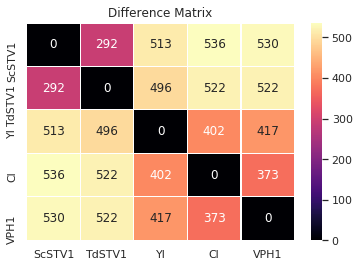

In [11]:
matrix = score_differences_between_sequences_by_pairwise_alignment("seqs.fa")

Note that because were are in a notebook, the heatmap of the matrix produced is nicely shown. You won't have that happen automatically on actual command line. (And that is why when called in that way it saves an image file of the plot. You'll note that was not saved in this case when called from the imported function, and so you can use the route in the section above if you need the plot image saved,)

Let's look at the matrix.

In [12]:
matrix

,ScSTV1,TdSTV1,Yl,Cl,VPH1
ScSTV1,0,292,513,536,530
TdSTV1,292,0,496,522,522
Yl,513,496,0,402,417
Cl,536,522,402,0,373
VPH1,530,522,417,373,0


You'll note that it renders in a notebook in a special manner that is more rich than just text of a table. This is because it is Pandas dataframe that has properties that make it useful.

You'll note that this text could be copied and used elsewhere; however, a text file of that data has already been made as well when the main function is run.

In [13]:
!cat diff_score_matrix.tsv

	ScSTV1	TdSTV1	Yl	Cl	VPH1
ScSTV1	0	292	513	536	530
TdSTV1	292	0	496	522	522
Yl	513	496	0	402	417
Cl	536	522	402	0	373
VPH1	530	522	417	373	0


We can confirm that text file was made by the latest run and not the earlier one in the 'Basics' section and demonstrate another option.  
That other option is that you can specify a file name to save the data table as when calling the function. (There is a parallel when working on the command line, using the `--df_output` flag followed by a text name to use.)

Sequences read in...
Longest sequence in input detected as 890.
...calculating all pairs of pairwise alignments...summarizing differences...

Results converted to a matrix of differences...

A table of the data has been saved as a text file (tab-delimited).
DATA is stored as ==> 'the_output_matrix.tsv'

Returning a dataframe with the information as well.

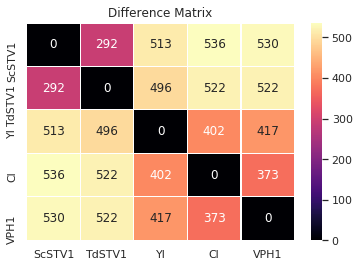

In [14]:
matrix = score_differences_between_sequences_by_pairwise_alignment("seqs.fa",df_save_as_name="the_output_matrix.tsv")

In [15]:
!cat the_output_matrix.tsv

	ScSTV1	TdSTV1	Yl	Cl	VPH1
ScSTV1	0	292	513	536	530
TdSTV1	292	0	496	522	522
Yl	513	496	0	402	417
Cl	536	522	402	0	373
VPH1	530	522	417	373	0


There is the output we just made.

Note the heatmap plot made when the function acts is an image rendering. However, you can have the data rendered stylistically while still being 'text' you can copy...  
Have dataframe output styled based on [here](https://pandas.pydata.org/pandas-docs/stable/user_guide/style.html#Builtin-styles):  
(This needs to be freshly run to show up right.)

In [16]:
import seaborn as sns
s = matrix.style.background_gradient(cmap="magma")
s

,ScSTV1,TdSTV1,Yl,Cl,VPH1
ScSTV1,0,292,513,536,530
TdSTV1,292,0,496,522,522
Yl,513,496,0,402,417
Cl,536,522,402,0,373
VPH1,530,522,417,373,0


This has the drawback that presently the stylistic rendering of the dataframe is lost when you reopen the notebook; it will just look like a regular dataframe when reopened and you'll need to re-run to re-render with shaded cells. However, it is real data you can paste into spreadsheets elsewhere. In fact the stylized background colors can even be output from a notebook to use in Excel with the shading being maintained. (That process is described [here](https://pandas.pydata.org/pandas-docs/stable/user_guide/style.html#Export-to-Excel) and will not be demonstrated here. I have personally had luck using `openpyxl`; just run `%pip install openpyxl` in a cell before you try it here.)

That covers the basics of using the function in a notebook. 

The additional options you can supply when you call the main function just let you control the output made a a finer level. They are:
- `return_df` - set to `False` if you don't want a dataframe returned when calling the function. It defaults to `True`
- `save_text_of_df` - set to `False` if you don't want a text table of the output saved when calling the function. It defaults to `True`.
- `generate_heatmap` - set to `False` if you don't want the heatmap made when calling the function. It defaults to `True`.  


-----

Feel free to substitute your data in here and run it.

Be sure to download anything you make that is useful.

Enjoy!